In [1]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from userfunctions import *

In [2]:
#plt.style.use('default')
sns.set()

In [3]:
#загрузили исходные данные
df_raw = pd.read_excel(r'Prioksk_Air_in.xlsx')
#очистили их от того, что не потребуется и что может привести к ошибкам
df = PrepareDataFrame(df_raw.copy())
#создадим копию для удобства
data_total = df.copy()
winter_data, spring_data, summer_data, autumn_data = PrepareSeasonalDataFrame(df.copy())

Некорректные строки удалены:

        YY  MM  DD  TSP  SO2  SO4   HG   PB   CD  NO2
5187  1998   9  31  NaN  0.0  NaN  NaN  NaN  NaN  NaN


# TSP

In [4]:
ELEM_NAME = 'TSP'
ELEM = CreateDataBySeasons(ELEM_NAME
                           , data_total, winter_data, spring_data, summer_data, autumn_data
                           , with_zero=True)
VALUES = ExtractValues(ELEM)

if CountZerosInData(VALUES['all'], ELEM_NAME) > 0:
    #НЕ словарь, просто массив по полной выборке соответ-го элемента
    ELEM_NOT_NULL = CreateDataBySeasons(ELEM_NAME
                                        , data_total, winter_data, spring_data, summer_data, autumn_data
                                        , with_zero=False)
    VALUES_NOT_NULL = ExtractValues(ELEM_NOT_NULL)
else:
    VALUES_NOT_NULL = VALUES

Число нулевых элементов в полной выборке TSP: 0



Гистограмма для полной выборки TSP


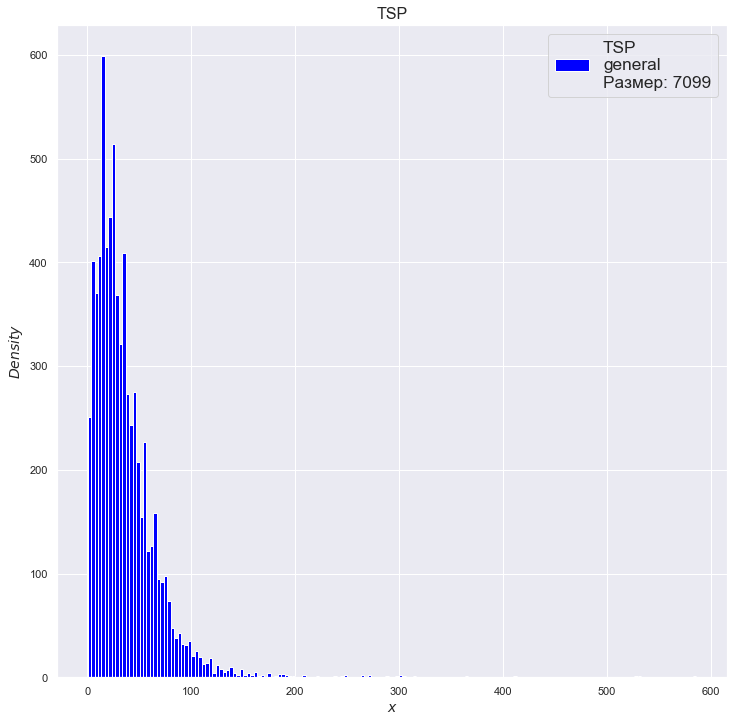

In [5]:
HistOnSample(VALUES['all'],ELEM_NAME)

In [73]:
start = datetime.datetime.now()
distr_ks, params_ks, p_v_ks, distr_chi2, params_chi2, p_v_chi2 = GetBestDistribution(VALUES_NOT_NULL['all'])
print ('\nTook time: {0}'.format(datetime.datetime.now()-start))


Chi2
Best fitting distribution: ncf
Best p value: 0.003824088429623568
Parameters for the best fit: (3.8914911020499288, 6.691067541808444, 6.284046141442772, 0.01553240992020602, 10.73015022263429)

K-S
Best fitting distribution: genexpon
Best p value: 0.5547153860430697
Parameters for the best fit: (0.12212285719637943, 0.8866115683493766, 2.0566595949492363, 0, 26.856560071271602)

Took time: 0:02:31.193945


In [74]:
distr_params_all = defaultdict(dict)
if p_v_ks >= 0.05:
    distr_params_all['general'][distr_ks] = params_ks
if p_v_chi2 >= 0.05:
    distr_params_all['general'][distr_chi2] = params_chi2

Text(0.5, 1.0, 'TSP')

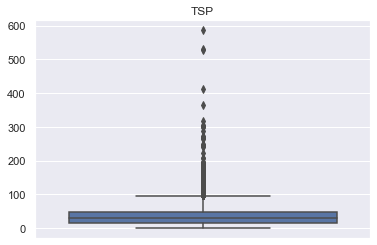

In [6]:
#sns.set(rc={'figure.figsize':(6,6)})
sns.boxplot(VALUES['all'],orient='v').set_title(ELEM_NAME)

In [78]:
SizeSample(VALUES['all'], ELEM_NAME)
k = CountZerosInData(VALUES['all'], ELEM_NAME)
CountByTreshold(VALUES['all'], ELEM_NAME,  10, 0.5)

Размер полной выборки для TSP равен 7099
Число нулевых элементов в полной выборке TSP: 0

Посмотрим на число элементов выше и ниже некоторых порогов для выборки TSP

Порог: 0.0, значений выше: 7099, ниже: 0
Порог: 0.5, значений выше: 7093, ниже: 6
Порог: 1.0, значений выше: 7030, ниже: 69
Порог: 1.5, значений выше: 7030, ниже: 69
Порог: 2.0, значений выше: 6950, ниже: 149
Порог: 2.5, значений выше: 6949, ниже: 150
Порог: 3.0, значений выше: 6848, ниже: 251
Порог: 3.5, значений выше: 6848, ниже: 251
Порог: 4.0, значений выше: 6772, ниже: 327
Порог: 4.5, значений выше: 6772, ниже: 327
Порог: 5.0, значений выше: 6671, ниже: 428
Порог: 5.5, значений выше: 6671, ниже: 428
Порог: 6.0, значений выше: 6555, ниже: 544
Порог: 6.5, значений выше: 6555, ниже: 544
Порог: 7.0, значений выше: 6447, ниже: 652
Порог: 7.5, значений выше: 6447, ниже: 652
Порог: 8.0, значений выше: 6334, ниже: 765
Порог: 8.5, значений выше: 6334, ниже: 765
Порог: 9.0, значений выше: 6218, ниже: 881
Порог: 9.5, значений вы

Построение графика всей выборки для TSP


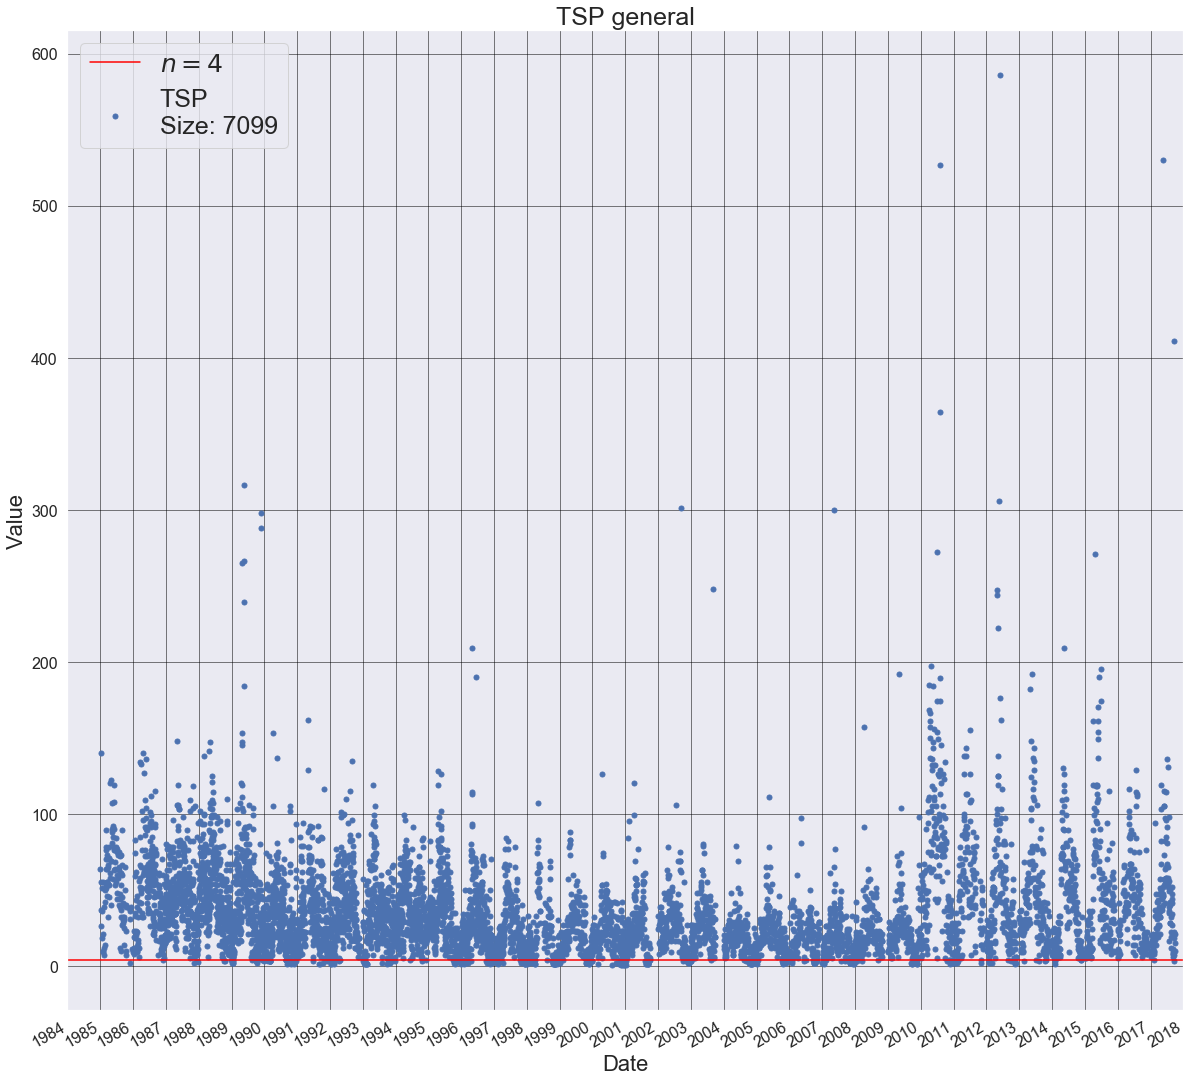

In [7]:
fig1 = PlotElement(ELEM['all'],ELEM_NAME,'general',20,20,4)

Гистограмма 0-1 теста Колмогорова-Смирнова для выборки TSP


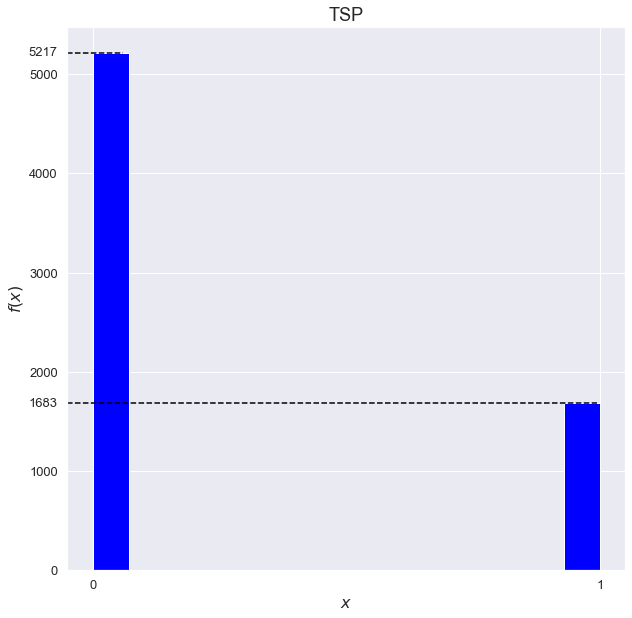

In [8]:
HistOnKSTest2Sample(KSTest2Sample(VALUES['all']), ELEM_NAME)

Принимаем гипотезу однородности К-С, если p-value > 0.05, сопоставляем ей 1, иначе 0
Число подряд идущих 1 - синим цветом, 0 - серым 


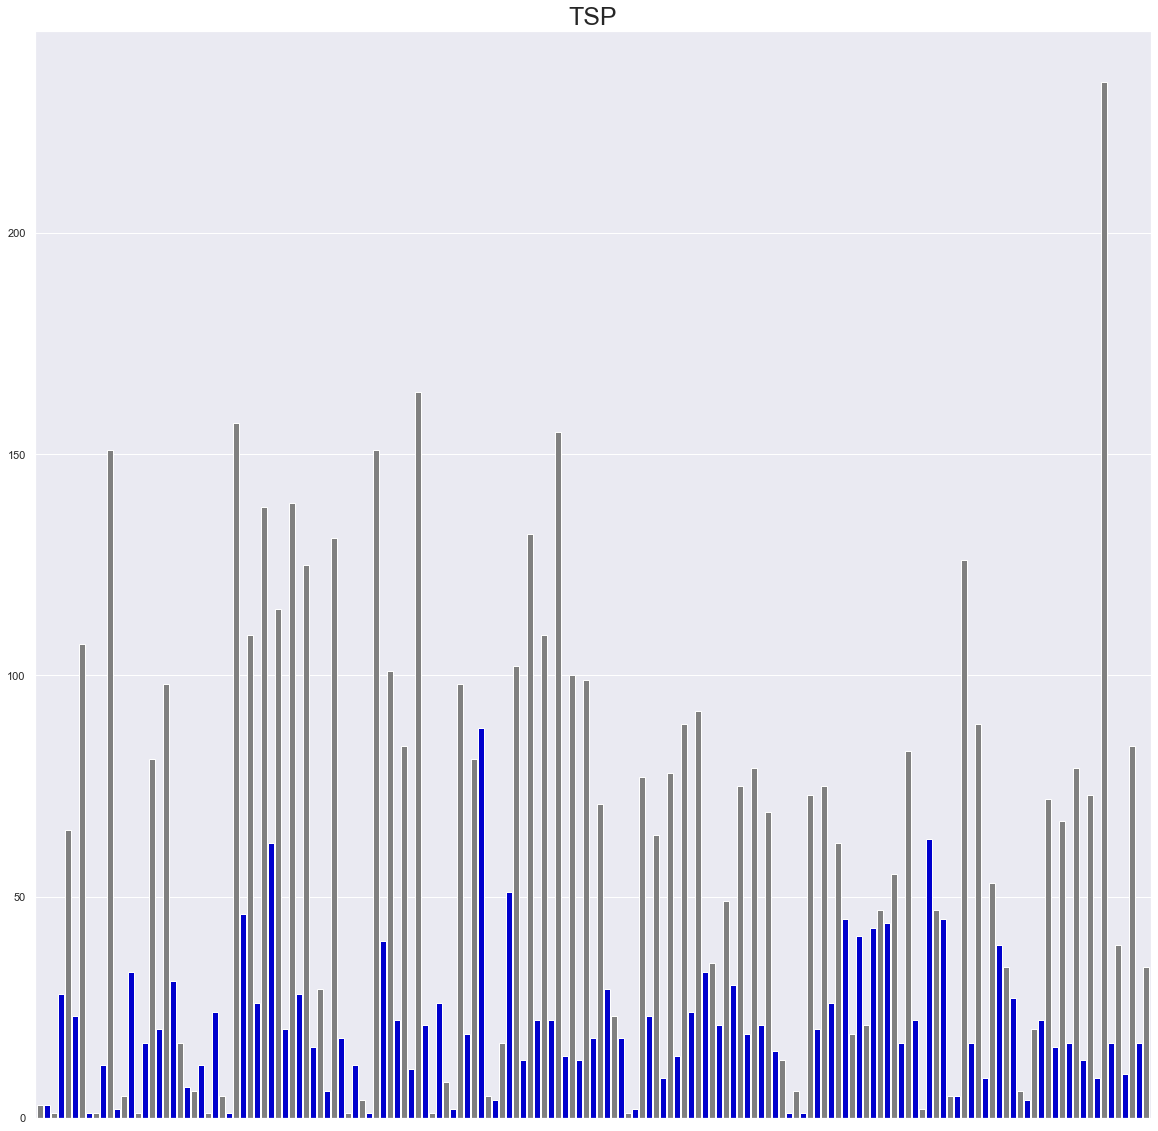

In [9]:
HistOnRepValues(RepeatedValuesCount(KSTest2Sample(VALUES['all'])),ELEM_NAME)

Поделим выборку на train и test (80 к 20), по 1-й оценим параметры, по 2-й проверим гипотезу о согласии К-С и Хи-квадрат для Гамма распределения

In [119]:
#GAMMA

test_size = 0.2

while True: 
    train, test = train_test_split(VALUES_NOT_NULL['all'], test_size=test_size)
    params = FitParams(train,'gamma', floc=0)
    s_chi2, p_chi2 = ChiSquareOnTest(test, 'gamma', params)
    s_ks, p_ks = KSOnTest(test, 'gamma', params)
    if p_chi2 >= 0.5 and p_ks >= 0.3:
        break
#based on chi2 and ks
#TSP
print('shape,loc,scale = {0}, p_v on Chi2 = {1}, p_v on KS = {2}'.format(params, p_chi2, p_ks))

shape,loc,scale = (1.6178425983503988, 0, 22.29966292129321), p_v on Chi2 = 0.9149493758899023, p_v on KS = 0.7117228543320193


In [120]:
distr_params_all['general']['gamma'] = params

Гистограмма для выборки TSP, сезон - general
Поверх нее строятся теоритические функции плотности вероятности с вычисленными параметрами


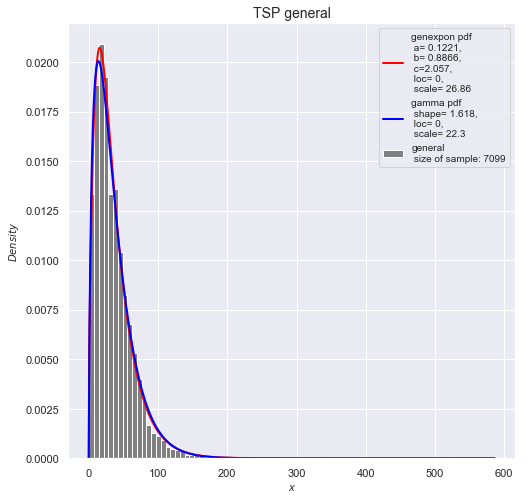

In [154]:
fig2 = DistributionBySeason(VALUES['all'], ELEM_NAME, 'general', distr_params_all['general'])

In [134]:
fig2.savefig('TSP_DistrAll.png', bbox_inches='tight', pad_inches=0)

In [448]:
distr_params_all

defaultdict(dict,
            {'general': {'genexpon': (0.22188427796156554,
               0.9308364518309735,
               2.172422680426216,
               0.4999999999499229,
               30.44566238768667),
              'gamma': (1.6140814539183452, 0, 22.338970802266573)}})

In [150]:
#GAMMA
print('GAMMA\n')

stat, p_v = KSOnTest(test, 'gamma', params)
print('KS TEST:\nPower_divergenceResult(statistic={0}, pvalue={1})'.format(stat, p_v))
stat, p_v = ChiSquareOnTest(test, 'gamma', params)
print('CHISQARE TEST:\nPower_divergenceResult(statistic={0}, pvalue={1})'.format(stat, p_v))

GAMMA

KS TEST:
Power_divergenceResult(statistic=0.018568296660520817, pvalue=0.7117228543320193)
CHISQARE TEST:
Power_divergenceResult(statistic=23.36857503918135, pvalue=0.9149493758899023)


## Рассмотрим сезонные выборки

In [450]:
params_seasons = {}

In [451]:
#GAMMA
seasons = ['winter', 'spring', 'summer', 'autumn']
params_seasons = {}
train_test_seasons = {}
for s in seasons:
    while True: 
        train, test = train_test_split(VALUES[s], test_size=0.2)
        params_seasons[s] = FitParams(train, 'gamma', floc=0)
        s_chi2, p_chi2 = ChiSquareOnTest(test, 'gamma', params_seasons[s])
        s_ks, p_ks = KSOnTest(test, 'gamma', params_seasons[s])
        if p_chi2 >= 0.7 and p_ks >=0.7:
            train_test_seasons[s] = [train, test]
            break
            
for s in seasons:
    print(s, ': ', params_seasons[s])

winter :  (1.7327168486043107, 0, 13.385319574102223)
spring :  (2.037562102775182, 0, 24.09921199057829)
summer :  (2.5318180632699407, 0, 16.681872851666967)
autumn :  (1.3597289078319237, 0, 19.353091698535433)


In [15]:
start = datetime.datetime.now()
seasons = ['winter', 'spring', 'summer', 'autumn']
params_seasons_ks,params_seasons_chi2 = defaultdict(dict), defaultdict(dict)
train_test_seasons1 = {}
for s in seasons:
    print()
    print(s.upper())
    print()
    distr_ks,params_ks,p_v_ks, distr_chi2,params_chi2, p_v_chi2 = GetBestDistribution(VALUES_NOT_NULL[s])
    if p_v_ks >= 0.05:
        params_seasons_ks[s][distr_ks] = params_ks
    if p_v_chi2 >= 0.05:
        params_seasons_chi2[s][distr_chi2] = params_chi2
print('\nTook time: {0}'.format(datetime.datetime.now()-start))


WINTER


Chi2
Best fitting distribution: ncf
Best p value: 0.14399833190297867
Parameters for the best fit: (4.3295725798919635, 15.79262506647602, 2.2113285610549404e-08, 0, 20.599544251234008)

K-S
Best fitting distribution: gamma
Best p value: 0.7123227341831894
Parameters for the best fit: (1.7723581386293852, 0, 13.042916240324212)

SPRING


Chi2
Best fitting distribution: mielke
Best p value: 0.10850998400793505
Parameters for the best fit: (1.6909009570714206, 3.098831234733665, 0.030892188217566542, 54.5008395393986)

K-S
Best fitting distribution: genexpon
Best p value: 0.6956998732181839
Parameters for the best fit: (2.4209881360445098e-08, 0.05679320401819209, 0.08197769489843776, 0.009744955159992671, 1.7849042332167393)

SUMMER


Chi2
Best fitting distribution: invgamma
Best p value: 0.17808099370636626
Parameters for the best fit: (7.567308257487742, -22.974868842465305, 426.79004731012316)

K-S
Best fitting distribution: powerlognorm
Best p value: 0.8032120142410551
Par

In [227]:
distr_params_seasons = defaultdict(dict)
for s in seasons:
    try:
        distr_ks, params_ks = list(params_seasons_ks[s].keys())[0], list(params_seasons_ks[s].values())[0] 
        distr_params_seasons[s][distr_ks] = params_ks
    except IndexError:
        continue
for s in seasons:
    try:
        distr_chi2, params_chi2 = list(params_seasons_chi2[s].keys())[0], list(params_seasons_chi2[s].values())[0] 
        distr_params_seasons[s][distr_chi2] = params_chi2
    except IndexError:
        continue
#for s in seasons:
 #   params_gamma = params_seasons[s]
  #  distr_params_seasons[s]['gamma'] = params_gamma
    

Гистограмма для выборки TSP, сезон - winter
Поверх нее строятся теоритические функции плотности вероятности с вычисленными параметрами


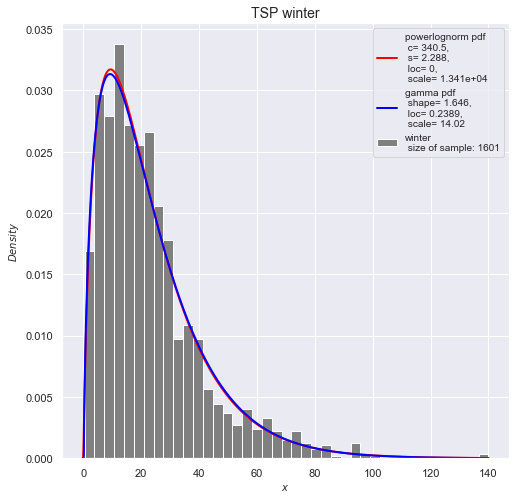

Гистограмма для выборки TSP, сезон - spring
Поверх нее строятся теоритические функции плотности вероятности с вычисленными параметрами


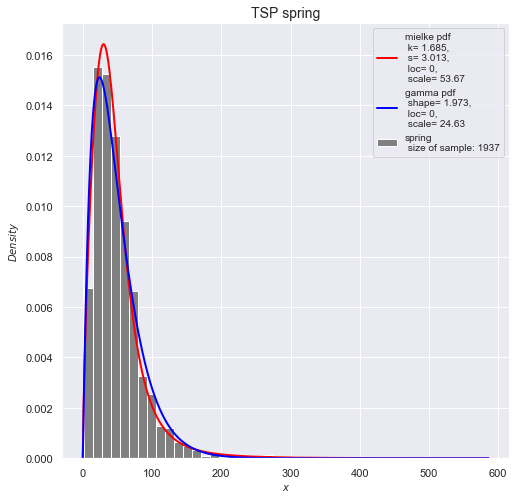

Гистограмма для выборки TSP, сезон - summer
Поверх нее строятся теоритические функции плотности вероятности с вычисленными параметрами


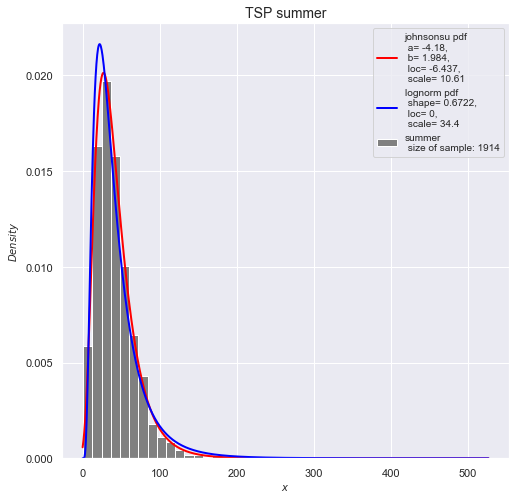

Гистограмма для выборки TSP, сезон - autumn
Поверх нее строятся теоритические функции плотности вероятности с вычисленными параметрами


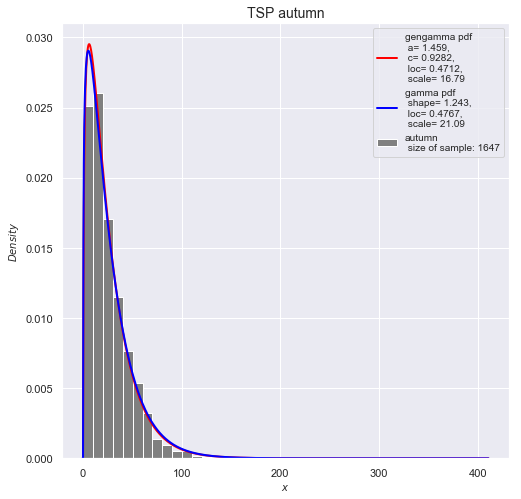

In [228]:
for s in seasons:
    DistributionBySeason(VALUES_NOT_NULL[s], ELEM_NAME, season=s, params_dict=distr_params_seasons[s])

### Проверка гипотезы о согласии Хи-квадрат и К-С для сезонных выборок для Гамма распределения
#### Для других подобранных распределений результаты выше

In [464]:
#GAMMA
for s in seasons:
    print(s.upper())
    print()
    stat, p_v = KSOnTest(train_test_seasons[s][1], 'gamma', params_seasons[s])
    print('KS TEST:\nPower_divergenceResult(statistic={0}, pvalue={1})'.format(stat, p_v))
    stat, p_v = ChiSquareOnTest(train_test_seasons[s][1], 'gamma', params_seasons[s])
    print('CHISQARE TEST:\nPower_divergenceResult(statistic={0}, pvalue={1})'.format(stat, p_v))
    print()

WINTER

KS TEST:
Power_divergenceResult(statistic=0.030662580873251022, pvalue=0.9234528123735154)
CHISQARE TEST:
Power_divergenceResult(statistic=5.382493805238487, pvalue=0.9797453865719995)

SPRING

KS TEST:
Power_divergenceResult(statistic=0.03553333158256261, pvalue=0.7113592808161919)
CHISQARE TEST:
Power_divergenceResult(statistic=11.082166841755027, pvalue=0.8043853749220566)

SUMMER

KS TEST:
Power_divergenceResult(statistic=0.03339319046274361, pvalue=0.7865445686168063)
CHISQARE TEST:
Power_divergenceResult(statistic=10.046156016249961, pvalue=0.8642068470550105)

AUTUMN

KS TEST:
Power_divergenceResult(statistic=0.03422574427031613, pvalue=0.8342533930820335)
CHISQARE TEST:
Power_divergenceResult(statistic=11.58195791981628, pvalue=0.7103560179839961)



## Нарисуем 4 гамма распределения, полученные в результате работы ЕМ алгоритма
Выборка делилась на 4 части, учитывая след формулу "количество элементов за данное время года / вся выборка"

Использовался метод gammamixEM из R

In [466]:
dic = {'x':VALUES_NOT_NULL['all']}
df = pd.DataFrame(dic, columns=['x'])
df.to_csv('TSPall.csv', index=False)

In [393]:
print('PROPORTIONS OF SEASON DATA FROM ALL DATA')
print('WINTER:', len(VALUES['winter'])/len(VALUES['all']), sep=' ')
print('SPRING:', len(VALUES['spring'])/len(VALUES['all']), sep=' ')
print('SUMMER:', len(VALUES['summer'])/len(VALUES['all']), sep=' ')
print('AUTUMN:', len(VALUES['autumn'])/len(VALUES['all']), sep=' ')

PROPORTIONS OF SEASON DATA FROM ALL DATA
WINTER: 0.22552472179180166
SPRING: 0.2728553317368643
SUMMER: 0.26961543879419636
AUTUMN: 0.23200450767713762


Веса: [0.27929902, 0.05428625, 0.3867227, 0.27969203]


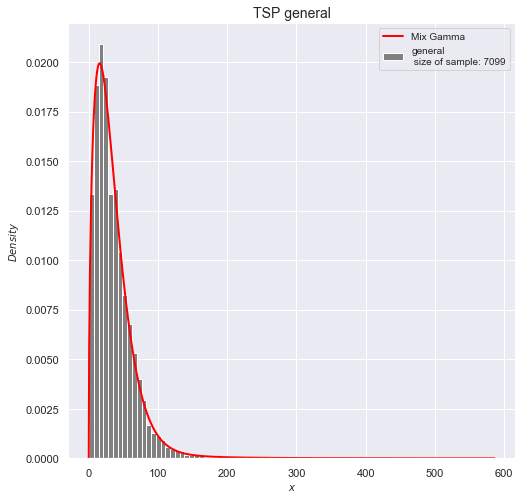

In [255]:
#start: alpha = c(1.71,2.01,2.59,1.37),beta = c(13.53, 24.23, 16.32, 19.27),lambda=c(0.23,0.27,0.27,0.23) maxit=150
sh_loc_sc1 = [[1.594103,0,16.756854],[1.000216,0,74.385141],[2.933228,0,14.788530],[1.60398,0,17.19467]]
lamb1 = [0.27929902, 0.05428625, 0.38672270, 0.27969203]

x = np.linspace(0, max(VALUES['all']),1000)

print('Веса: {0}'.format(lamb1))   
fig3 = EMGammaMixPlot_4(sh_loc_sc1, lamb1)
fig3.savefig('TSP_MixGamma.png', bbox_inches='tight', pad_inches=0)

## Нарисуем 3 гамма распределения, полученные в результате работы ЕМ алгоритма
Выборка делилась на 3 равные части

Использовался метод gammamixEM из R

Веса: [0.48217712, 0.47208197, 0.04574091]


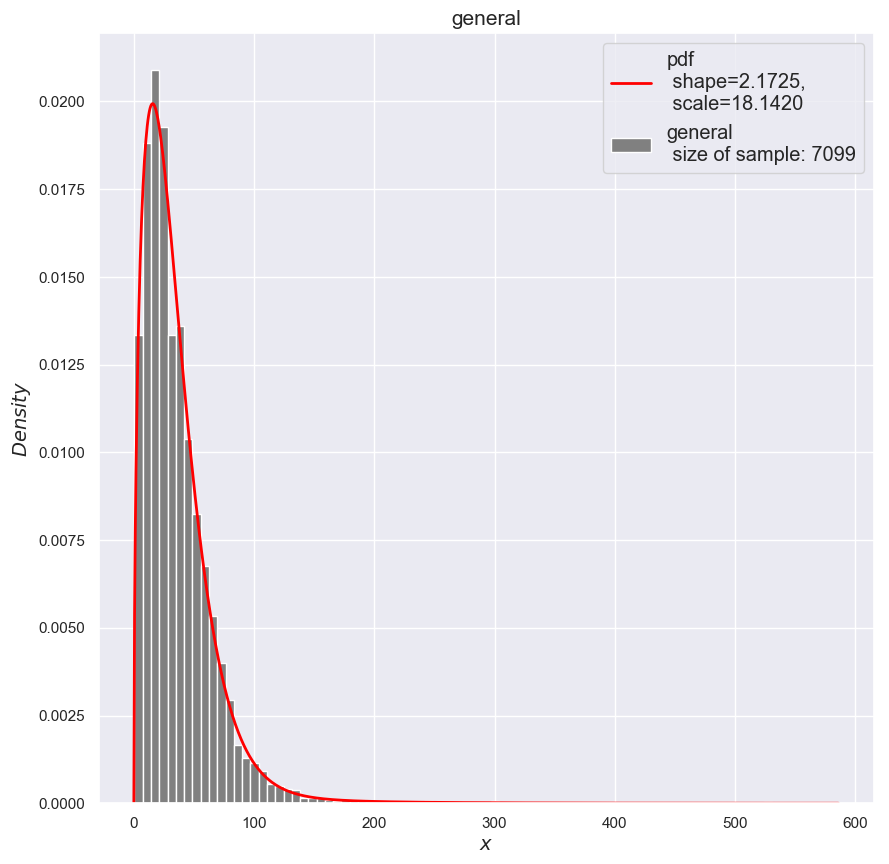

In [478]:
#зададим в R lambda=c(1,1,1)/3
sh_sc1 = [[1.560413,13.668313],[2.681971,15.661756],[1.036026,84.516299]]
#зададим в R пропорции 3-х частей, полученных из графика,границы-черные линии lambda=c(0.46, 0.36, 0.18),maxit=150
pp = [[1.599385,0,15.270199],[2.870521,0,15.174677],[1.00934,0,79.04036]]  
weigh = [0.48217712, 0.47208197, 0.04574091]
 
def EMGammaMixPlot_3():
    plt.figure(figsize=(10,10))

    x = np.linspace(0, max(VALUES['all']),1000)

    sh1, loc1, sc1 = FitParams(VALUES['all'], 'gamma', floc=0)
    y1_em3 = CreateCombPDF(weigh,pp)
    sh_sc_y1_em3 = ShapeScaleCombPDF(weigh, pp)
    plt.plot(x,y1_em3,color='red',lw=2,label='pdf\n shape={0:.4g},\n scale={1:.4g}'. \
             format(sh_sc_y1_em3[0],sh_sc_y1_em3[1]))
    
    plt.hist(VALUES['all'], bins='sqrt', density=True, color='grey',
             label='{0}\n size of sample: {1}'.format('general',len(VALUES['all'])))
    plt.title('general',fontsize=15)
    plt.legend(loc='best', fontsize='large')
    plt.ylabel('$Density$', fontsize=14)
    plt.xlabel('$x$', fontsize=14)
    plt.show()

print('Веса: {0}'.format(weigh))
EMGammaMixPlot_3()